### Objective: 
Explore the cleaned Walmart dataset to understand trends, seasonality, holiday effects, and feature relationships that influence weekly sales.

### Input: 
data/processed/walmart_cleaned.csv

### Output: 
Visual insights and hypotheses for modeling.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

warnings.filterwarnings('ignore')

In [10]:
#Set plot style
sns.set(style='whitegrid')

#Create an output folder for the output files
os.makedirs('plots', exist_ok=True)
print('Successfully created directory for output')

Successfully created directory for output


## Univariate analysis
In this section of univariate analysis we will be aiming to examine one variable at a time. this emans that there will be a focus on distribution spreads and outliers.

### Data Overview
Now below let's have a quick glance at what the data contyains before we start to go over the analysis of the data

In [ ]:
#Load  the dataset and then dislay some of the contents
df = pd.read_csv('../Data/processed/merged_sales_data.csv')
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,0,151315,2010,2,5,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,0,151315,2010,2,6,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,0,151315,2010,2,7,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,0,151315,2010,2,8,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,0,151315,2010,3,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,1,118221,2012,9,39,4
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,1,118221,2012,10,40,4
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,1,118221,2012,10,41,4
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,1,118221,2012,10,42,4


In [ ]:
#Look at the an overview of the dataframe with the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     421570 non-null  float64
 8   MarkDown2     421570 non-null  float64
 9   MarkDown3     421570 non-null  float64
 10  MarkDown4     421570 non-null  float64
 11  MarkDown5     421570 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  int64  
 15  Size          421570 non-null  int64  
 16  Year          421570 non-null  int64  
 17  Month         421570 non-null  int64  
 18  Week

In [12]:
#View the summary for the statistical components of the data
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.0
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,0.589912,136727.915739,2010.968591,6.449510,25.826762,4.0
std,12.785297,30.492054,22711.183519,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,0.666337,60980.583328,0.796876,3.243217,14.151887,0.0
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,0.000000,34875.000000,2010.000000,1.000000,1.000000,4.0
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,0.000000,93638.000000,2010.000000,4.000000,14.000000,4.0
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,0.000000,140167.000000,2011.000000,6.000000,26.000000,4.0
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,1.000000,202505.000000,2012.000000,9.000000,38.000000,4.0
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,2.000000,219622.000000,2012.000000,12.000000,52.000000,4.0


The main target we want to start with is a close look at the `Weekly Sales` column and see what we can infer from it

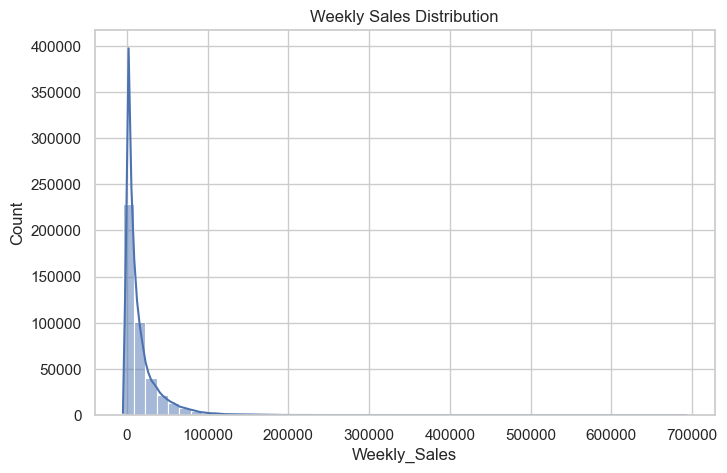

In [13]:
#Target Variable distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Weekly Sales Distribution")
plt.savefig("plots/univariate_weekly_sales_dist.png")
plt.show()

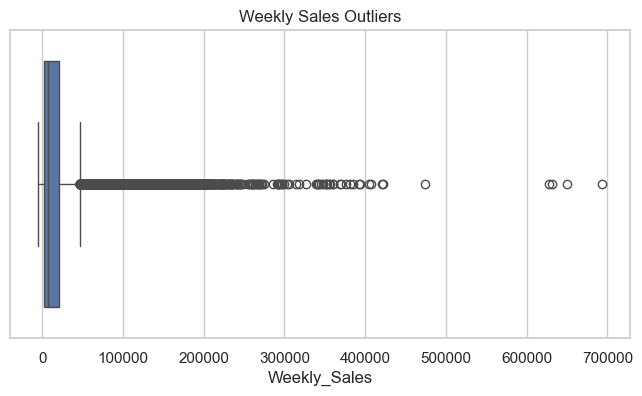

In [14]:
#Try and find outliers in the target variable
plt.figure(figsize=(8,4))
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Weekly Sales Outliers")
plt.savefig("plots/univariate_weekly_sales_box.png")
plt.show()